In [1]:
import os
import torch
import torchvision
from torch import nn

In [2]:

!mkdir -p ~/.kaggle

from google.colab import files
uploaded = files.upload()

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d shubhamgoel27/dermnet

!unzip dermnet.zip -d dermnet

Streaming output truncated to the last 5000 lines.
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keloids-8.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keloids-80.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keloids-9.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-100.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-101.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-102.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-103.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-104.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-105.jpg  
  inflating: dermnet/train/Seborrheic Keratoses and other Benign Tumors/keratoacanthoma-106.jpg 

In [4]:
!ls dermnet

test  train


In [5]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [6]:
# @title Default title text
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np

# 定义预处理步骤
transform_train = transforms.Compose([
    transforms.Resize((180, 180)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

transform_test = transforms.Compose([
    transforms.Resize((180, 180)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

# 定义你想要加载的类别
selected_folders = ['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Tinea Ringworm Candidiasis and other Fungal Infections',
  'Melanoma Skin Cancer Nevi and Moles',
 'Eczema Photos']  # 替换为你想加载的类别

train_data_dir = '/content/dermnet/train'
test_data_dir = '/content/dermnet/test'

# 加载完整的训练数据和测试数据
df_train_full = datasets.ImageFolder(root=train_data_dir, transform=transform_train)
df_test_full = datasets.ImageFolder(root=test_data_dir, transform=transform_test)

# 获取类别名与索引的映射
# Original: class_to_idx = {v: k for k, v in df_train_full.class_to_idx.items()}  # 反转字典
# Changed: Using the original class_to_idx where keys are class names and values are indices
class_to_idx = df_train_full.class_to_idx

# 找出选定类别对应的索引
# Original: selected_idx = [class_to_idx[folder] for folder in selected_folders]
# Changed: Accessing the index using the class name as the key
selected_idx = [class_to_idx[folder] for folder in selected_folders if folder in class_to_idx]

# 过滤出选定类别的数据索引
train_indices = [i for i, (_, label) in enumerate(df_train_full) if label in selected_idx]
test_indices = [i for i, (_, label) in enumerate(df_test_full) if label in selected_idx]

# 使用 Subset 只加载指定类别的数据
df_train_subset = Subset(df_train_full, train_indices)
df_test_subset = Subset(df_test_full, test_indices)

# DataLoader
batch_size = 64
train_data_loader = DataLoader(df_train_subset, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(df_test_subset, batch_size=batch_size, shuffle=False)

# 查看加载数据的类别
class_names = [folder for folder in df_train_full.classes if folder in selected_folders]
print(class_names)

['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Melanoma Skin Cancer Nevi and Moles', 'Tinea Ringworm Candidiasis and other Fungal Infections']


In [7]:
# @title Default title text
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_data_dir = '/content/dermnet/train'
test_data_dir = '/content/dermnet/test'
df_train = datasets.ImageFolder(root=train_data_dir, transform=transform_train)
df_test = datasets.ImageFolder(root=test_data_dir,transform=transform_test)

# DataLoader
batch_size = 64
train_data_loader = DataLoader(df_train, batch_size=batch_size, shuffle=True)
test_data_loader = DataLoader(df_test, batch_size=batch_size, shuffle=False)



# show a batch data
images, labels = next(iter(train_data_loader))
print(f'Image batch shape: {images.shape}')
print(f'Label batch shape: {labels.shape}')

class_names = df_train.classes
print(class_names)

Image batch shape: torch.Size([64, 3, 224, 224])
Label batch shape: torch.Size([64])
['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Bullous Disease Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Hair Loss Photos Alopecia and other Hair Diseases', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Nail Fungus and other Nail Disease', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Scabies Lyme Disease and other Infestations and Bites', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [8]:
test_data_loader
train_data_loader

In [9]:
# @title Default title text
!pip install torch torchvision
!pip install efficientnet-pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16425 sha256=0bf377a12be09462bf87889f34c0a53c92a4a64e5ea405b08cd66c1da73c2463
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet-pytorch


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# TODO modify model

class CustomResNet50(nn.Module):
    def __init__(self, num_classes):
        super(CustomResNet50, self).__init__()
        # load ResNet50
        self.base_model = models.resnet50(weights='IMAGENET1K_V1')


        self.base_model.fc = nn.Identity()


        self.fc1 = nn.Linear(2048, 512)
        self.fc2 = nn.Linear(512, num_classes)


        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.base_model(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = 23
model = CustomResNet50(num_classes=num_classes).to(device)

In [12]:
class CustomMobileNetV2(nn.Module):
    def __init__(self, num_classes):
        super(CustomMobileNetV2, self).__init__()
        # load MobileNetV2
        self.base_model = models.mobilenet_v2(pretrained=True)


        self.base_model.classifier = nn.Identity()


        self.fc1 = nn.Linear(1280, 512)
        self.fc2 = nn.Linear(512, num_classes)


        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.base_model(x)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

num_classes = 23
model = CustomMobileNetV2(num_classes=num_classes).to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 92.5MB/s]


In [13]:
# define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [14]:
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_score is None:
            self.best_score = val_loss
        elif val_loss > self.best_score:
            self.counter += 1
            if self.verbose:
                print(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = val_loss
            self.counter = 0

/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch [1/50], Step [5/244], Train Loss: 2.9517, Train Accuracy: 13.12%
Epoch [1/50], Step [10/244], Train Loss: 2.9035, Train Accuracy: 16.09%
Epoch [1/50], Step [15/244], Train Loss: 2.8685, Train Accuracy: 16.15%
Epoch [1/50], Step [20/244], Train Loss: 2.8556, Train Accuracy: 16.41%
Epoch [1/50], Step [25/244], Train Loss: 2.8399, Train Accuracy: 16.88%
Epoch [1/50], Step [30/244], Train Loss: 2.8058, Train Accuracy: 17.97%
Epoch [1/50], Step [35/244], Train Loss: 2.8059, Train Accuracy: 18.12%
Epoch [1/50], Step [40/244], Train Loss: 2.7803, Train Accuracy: 18.75%
Epoch [1/50], Step [45/244], Train Loss: 2.7657, Train Accuracy: 19.24%
Epoch [1/50], Step [50/244], Train Loss: 2.7482, Train Accuracy: 19.75%
Epoch [1/50], Step [55/244], Train Loss: 2.7332, Train Accuracy: 19.97%
Epoch [1/50], Step [60/244], Train Loss: 2.7234, Train Accuracy: 20.23%
Epoch [1/50], Step [65/244], Train Loss: 2.7157, Train Accuracy: 20.58%
Epoch [1/50], Step [70/244], Train Loss: 2.7154, Train Accuracy: 

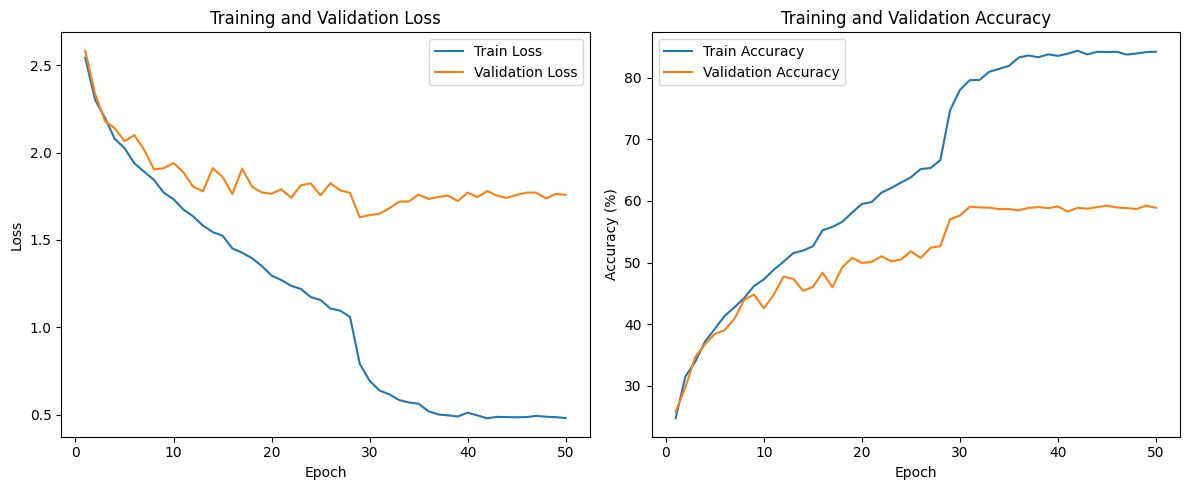

In [15]:
import matplotlib.pyplot as plt
import torch.optim as optim

# define ReduceLROnPlateau schedule
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

# num_epochs = 70
num_epochs = 50
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

early_stopping = EarlyStopping(patience=5, verbose=True)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_data_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i + 1) % 5 == 0:
            batch_loss = running_loss / (i + 1)
            batch_accuracy = 100 * correct / total
            print(f'Epoch [{epoch + 1}/{num_epochs}], Step [{i + 1}/{len(train_data_loader)}], '
                  f'Train Loss: {batch_loss:.4f}, Train Accuracy: {batch_accuracy:.2f}%')

    avg_loss = running_loss / len(train_data_loader)
    avg_accuracy = 100 * correct / total
    train_losses.append(avg_loss)
    train_accuracies.append(avg_accuracy)
    print(f'Epoch [{epoch + 1}/{num_epochs}] completed. Average Train Loss: {avg_loss:.4f}, '
          f'Average Train Accuracy: {avg_accuracy:.2f}%')

    # validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in test_data_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    avg_val_loss = val_running_loss / len(test_data_loader)
    avg_val_accuracy = 100 * val_correct / val_total
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}] completed. Validation Loss: {avg_val_loss:.4f}, '
          f'Validation Accuracy: {avg_val_accuracy:.2f}%')


    #early_stopping(avg_val_loss)
    #if early_stopping.early_stop:
    #    print("Early stopping")
    #    break

    # ReduceLROnPlateau learning rate
    scheduler.step(avg_val_loss)

# loss diagram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# accuracy diagram
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# save
# torch.save(model.state_dict(), 'resnet50_skin_disease_model.pth')
torch.save(model, 'mobilenet__skin_disease_model.pth')

In [17]:


from google.colab import files
files.download('mobilenet__skin_disease_model.pth')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Accuracy: 58.90%
                                                                    precision    recall  f1-score   support

                                           Acne and Rosacea Photos       0.80      0.91      0.85       312
Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions       0.65      0.61      0.63       288
                                          Atopic Dermatitis Photos       0.51      0.49      0.50       123
                                            Bullous Disease Photos       0.44      0.39      0.42       113
                Cellulitis Impetigo and other Bacterial Infections       0.35      0.26      0.30        73
                                                     Eczema Photos       0.59      0.66      0.62       309
                                      Exanthems and Drug Eruptions       0.51      0.54      0.53       101
                 Hair Loss Photos Alopecia and other Hair Diseases       0.51      0.57      0.54        60
     

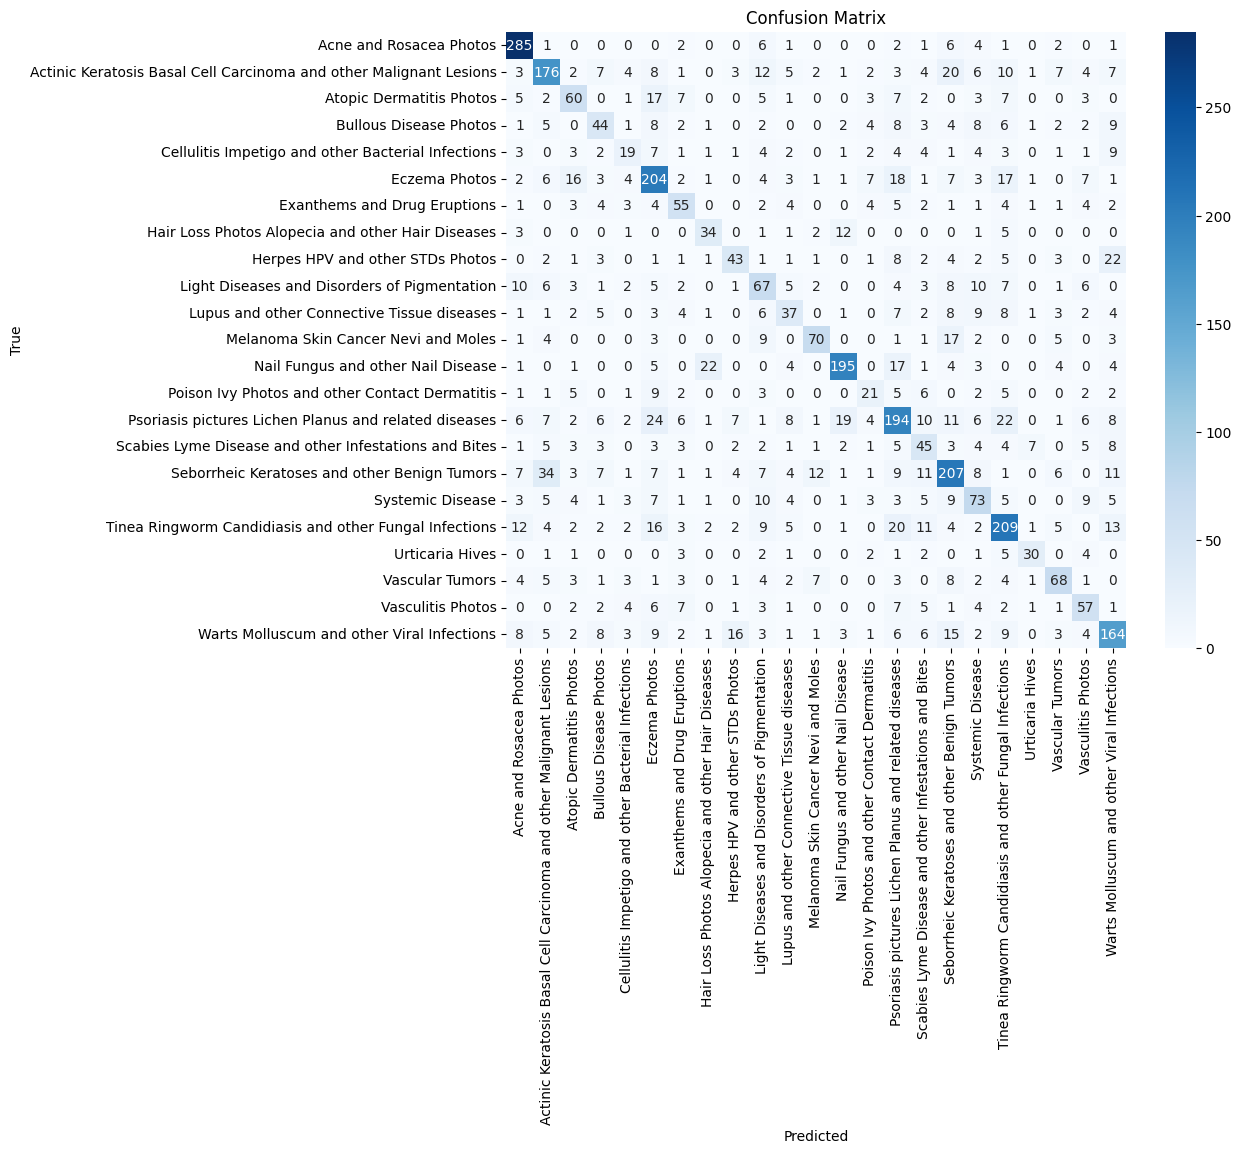

In [18]:

model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Test Accuracy: {accuracy:.2f}%')


from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# classifier report
print(classification_report(y_true, y_pred, target_names=class_names))

# confusion matrix
cm = confusion_matrix(y_true, y_pred)

# The confusion matrix heat map
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
